Erik Ossner, eco9

**Data Collection and Research Question / Purpose**: The data collection for this project was done by using the requests package, as well as BeautifulSoup, in order to web scrape the Apple App Store (108 lines of Python). The collection begins at the app store overview page (https://apps.apple.com/us/genre/ios/id36). 

Next, the user is prompted for their desired category of application to web scrape data from (or it can be inputted as a list of multiple, seperated by commas).

In the case of this project, only a subset of related categories are utilized: adventure, action, simulation, and role-playing games. This was done for two reasons, the first of which being that I did not want to exceed the 20MB data limit. And more importantly, the goal here is to show trends based on *related* applications, not just a pool of every category on the app store. 

After the category is selected, the search page is dynamically searched until a link containing the category keyword is found. This redirects the program to the "Popular Apps" section of that category. This project will aim to identify trends in what Apple considers "top" applications (based on their ranking algorithm), so this is the key page we need.

Every "Popular Apps" section contains around 250 applications for the selected category. They are not, however, ranked based purely on high rating, nor download count. In fact, there is no concretely evident method behind this ranking. As such, in order to potentially gain better insight into which apps to have the best shot of being a well promoted application, a variety of variables will be explored and delved further into for each top app, in order to explore relationships and trends: title, description, icon image, summary, rating score (and number of ratings), price, rank, latest date (for update or release), reviews.

All of these attributes and scraped from each application on the page, and compiled into a CSV file. Every category (mentioned above) has its own CSV file, but all of them have been merged externally into a single CSV.

Data Cleaning and Curation begins below:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

app_data = pd.read_csv("app_data.csv")
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6 • 200.6K Ratings,Free,#6 in Action,"October 1, 2020","Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas..."
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5 • 614 Ratings,Free,#144 in Adventure,"January 2, 2020",I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game..."
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0 • 6 Ratings,Free,NaN,NaN,NaN,"Samurai Slash - Run & Slice, Ketchapp, Games, ..."
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4 • 1.3K Ratings,Free,NaN,"April 8, 2020","So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A..."
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,3.9 • 2.2K Ratings,Free,#157 in Adventure,"February 14, 2020",This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games..."


In [2]:
print("We have " + str(len(app_data.columns)) + " attributes and " + str(len(app_data)) + " rows to analyze")

We have 10 attributes and 964 rows to analyze


At first glance, this data is not too bad. We have 10 attributes and 964 apps (rows). The first thing to note though, is that interrelated app categories were purposely chosen, and as such, we should account for duplicates (apps listed in more than one of our chosen categories).`

In [3]:
app_data = app_data.drop_duplicates()
print("We have " + str(len(app_data.columns)) + " attributes and " + str(len(app_data)) + " rows to analyze")

We have 10 attributes and 813 rows to analyze


As we can see, there were 964 - 813 = 151 duplicate apps, which could have significantly skewed the data. Next, when we do analysis of the data, NaN will not be helpful. So, I will replace all instances with an empty string.

In [4]:
import numpy as np
app_data = app_data.replace(np.nan, '', regex=True)
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6 • 200.6K Ratings,Free,#6 in Action,"October 1, 2020","Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas..."
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5 • 614 Ratings,Free,#144 in Adventure,"January 2, 2020",I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game..."
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0 • 6 Ratings,Free,,,,"Samurai Slash - Run & Slice, Ketchapp, Games, ..."
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4 • 1.3K Ratings,Free,,"April 8, 2020","So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A..."
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9 • 2.2K Ratings,Free,#157 in Adventure,"February 14, 2020",This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games..."


As of now, the name, description, icon, and summary columns are cleaned up. As seen above though, the rating column constains a combination of both the score (out of 5), as well as the number of ratings. We will split these into seperate columns, and change the number of ratings into a purely numerical format.

In [5]:
import re

def to_numeric(string):
    factor = 1
    if "K" in string:
        factor = 1000
    elif "M" in string:
        factor = 1000000
    elif "B" in string:
        factor = 1000000000
        
    #Regex to find all decimals, credited to Tutorialspoint.com
    list_num = re.findall('\d*\.?\d+',string)
    num_ratings = float(list_num[0]) * factor
    return int(num_ratings)

In [6]:
ratings = []
num_ratings = []
for rate in app_data["rating"]:
    if not rate == "":
        ratings.append(float(rate.split("•")[0].strip()))
        num_ratings.append(to_numeric(rate.split("•")[1].strip()))
    else:
        ratings.append(0.0)
        num_ratings.append(0)
app_data.loc[:, "rating"] = ratings
app_data["rating_count"] = num_ratings

In [7]:
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6,Free,#6 in Action,"October 1, 2020","Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas...",200600
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5,Free,#144 in Adventure,"January 2, 2020",I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game...",614
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0,Free,,,,"Samurai Slash - Run & Slice, Ketchapp, Games, ...",6
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4,Free,,"April 8, 2020","So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A...",1300
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9,Free,#157 in Adventure,"February 14, 2020",This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games...",2200


Now, the rating column and rating_count columns are acceptable. Save the file here as an intermediate point.

In [8]:
app_data.to_csv("updated_app_data.csv", index=False)

Next, we move onto price. This column is structred nicely for humans, but for the purposes of structuring this dataset, we will remove the "$" characters, and give "Free" apps a price of 0.0

In [9]:
app_data = pd.read_csv("updated_app_data.csv")
app_data = app_data.replace(np.nan, '', regex=True) #It seems to treat the empty string as NaN upon reloading, so repeat this code
prices_num = []
for price in app_data["price"]:
    if price =="Free" or price == "":
        prices_num.append(0.0)
    else:
        prices_num.append(float(price[1:]))
app_data.loc[:, "price"] = prices_num

In [10]:
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6,0.0,#6 in Action,"October 1, 2020","Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas...",200600
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5,0.0,#144 in Adventure,"January 2, 2020",I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game...",614
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0,0.0,,,,"Samurai Slash - Run & Slice, Ketchapp, Games, ...",6
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4,0.0,,"April 8, 2020","So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A...",1300
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9,0.0,#157 in Adventure,"February 14, 2020",This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games...",2200


The data is cleaned up to the price column. We will also want to convert the data_latest strings into DateTime objects for the computer to easily recognize them.

In [11]:
good_dates = []
for date in app_data['date_latest']:
    if not date == "":
        try:
            good_dates.append(pd.to_datetime(date, format = "%B %d, %Y"))
        except: #Weird / inconsistent format
            good_dates.append("") 
    else:
        good_dates.append("")
app_data.loc[:, 'date_latest'] = good_dates
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6,0.0,#6 in Action,2020-10-01,"Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas...",200600
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5,0.0,#144 in Adventure,2020-01-02,I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game...",614
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0,0.0,,NaT,,"Samurai Slash - Run & Slice, Ketchapp, Games, ...",6
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4,0.0,,2020-04-08,"So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A...",1300
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9,0.0,#157 in Adventure,2020-02-14,This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games...",2200


For the rank column, the category of the rank is not too significant in the case of this project, so we will only consider the numeric rank.

In [12]:
rank_new= []
for r in app_data["rank"]:
    if r=="":
        rank_new.append("")
    else:
        r_lst = r.split(" ")
        digits = r_lst[0]
        rank_new.append(int(digits[1:]))
app_data.loc[:, 'rank'] = rank_new
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6,0.0,6,2020-10-01,"Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas...",200600
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5,0.0,144,2020-01-02,I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game...",614
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0,0.0,,NaT,,"Samurai Slash - Run & Slice, Ketchapp, Games, ...",6
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4,0.0,,2020-04-08,"So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A...",1300
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9,0.0,157,2020-02-14,This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games...",2200


As of now, everything is looking good! Next, I will make some "helper" columns that may be useful in later analysis: description and summary length for each app, as well as a "volume" measure (rating * rating count) <br>

Also, save final cleaned dataset here as well.

In [13]:
description_length = [len(d) for d in app_data["description"]]
summary_length = [len(s) for s in app_data["summary"]]
volume = []
count = 0
for rating in app_data["rating"]:
    volume.append(round(rating * app_data["rating_count"][count], 2))
    count += 1
app_data["description_length"] = description_length
app_data["summary_length"] = summary_length
app_data["volume"] = volume
app_data.to_csv("app_data_final.csv", index=False)
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count,description_length,summary_length,volume
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6,0.0,6,2020-10-01,"Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas...",200600,1589,25,922760.0
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5,0.0,144,2020-01-02,I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game...",614,1343,30,2149.0
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0,0.0,,NaT,,"Samurai Slash - Run & Slice, Ketchapp, Games, ...",6,361,19,30.0
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4,0.0,,2020-04-08,"So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A...",1300,1353,22,5720.0
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9,0.0,157,2020-02-14,This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games...",2200,2148,0,8580.0


The full dataset is cleaned and ready.

**Data Description**: <br>
The *observations* (rows) each represent a single application that appeared on Apple's "Popular Apps" page for one of the four categories of games: action, adventure, role-playing, simulation.<br>

The *attributes* (columns), as described initially, going left to right, are as follows:<br>
        **name**: title of application<br>
        **description**: creator's description of application<br>
        **icon**: link to public image icon of application<br>
        **summary**: brief summary / catch phrase of application<br>
        **rating**: average user rating (out of 5.0)<br>
        **price**: price of application. 0.0 indicates a free app<br>
        **rank**: number of app's potential ranking for any given category<br>
        **date_latest**: either release date, or date of latest update<br>
        **reviews**: compilation of multiple randomly selected reviews for the application<br>
        **keywords**: keywords for App Store search engine optimization, chosen by developer<br>
        **rating_count**: number of users who rated the application<br>
        **description_length**: length of the description (in characters)<br>
        **summary_length**: length of the summary (in characters)<br>
        **volume**: average ratings * total number of ratings. More of a heuristic measure / derived calculation<br>
        <br>
Columns added for final analysis:<br>
    **traction**: volume of app / days since last release<br>
    **icon (numeric)**: given a score of 0-100 based on the color scheme (discussed in-depth later) <br>
    **description_length**: length of description (characters) <br>
    **summary_length**: length of summary (characters)<br>
    **keywords (numeric)**: heuristic score for keywords of an app (discussed in-depth later)<br>
    **classify**: 1 if the app is "popular", 0 if not (collection process documented later for the un-popular apps)<br><br>

This dataset was created by Erik Ossner (myself), in order to further explore potential relationships in variables of Apple's "Popular Apps", to give a better insight into how Apple's popularity classification works. The data used in the dataset was funded by Apple, and independently created by individual and teams of app developers. As such, this data is not owned by me in any way, and the data will be carefully and respectfully utilized in order to preserve as much of the creators' original efforts and work as possible. Much web-scraping and preprocessing was done in order to get this data into this final format (see all steps above). People are not directly involved in this data collection, as we are analyzing products created by people. The CSV compiled data can be found here: https://github.com/3r1k021/info2950 <br>
   
**Limitations**: Some limitations of this may be the lack of SEO-based (search engine optimization-based) data. We pool many of the explicit fields given involving an app--in other words, fields that as easy for any outsider to go in and view--and while these will likely yield some informative trends, it is likely that this dataset can be strengthened even further by gathering more meta-data for each application (key-words, etc). As of now, the data gathered may be able to show us trends, but may lack depth in relation to the actual research question of understanding Apple's classification methods of a "popular app". Similarly, some of the fields (summary, description) have been given derived columns to include information such as character count, but more of such columns may be needed to reveal some of the deeper trends we are looking for. For example, the image link itself is currently not going to yield anything interesting for analysis. But, by potentially passing it into an API to extract key colors, it may be a more comparible variable. If these ideas were not considered, it may end up that this project leads to either surface level, or misleading results of how to optimize apps for future users of the project. To help resolve these issues, such extensions to existing attributes, mentioned above, will be considered and executed in coming project sessions.
      

**Initial Exploratory Analysis of Variables**: In this section, a brief exploration of some variables will be done, including plots and graphs 

The mean app score is 4.02
The app score standard deviation is 1.02


Text(0, 0.5, 'Count')

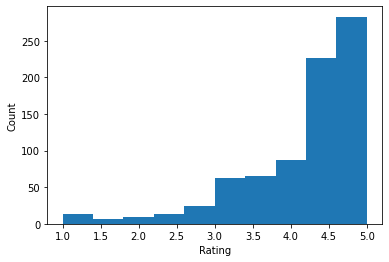

In [14]:
import matplotlib.pyplot as plt
import numpy
print("The mean app score is "+ str(round(np.mean(app_data["rating"]), 2)))
print("The app score standard deviation is "+ str(round(np.std(app_data["rating"]), 2)))
plt.hist(app_data[app_data["rating"] > 0]["rating"]) #discard any apps with no ratings
plt.xlabel("Rating")
plt.ylabel("Count")

**Observations**: Significantly skewed to the left (expected). A majority of the "popular apps" section contains 4.5 and 5-star apps. The mean is 4.01 with a standard deviation of 1.04. Still worth mentioning in final analysis, and doing further analysis on.

Text(0, 0.5, 'Count')

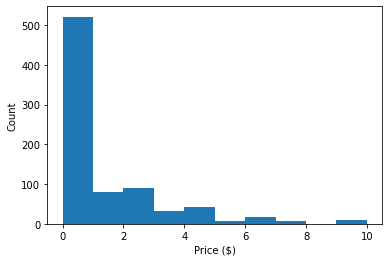

In [15]:
plt.hist(app_data[app_data["price"] < 10]["price"]) #discard any apps with very high prices (for easier visualization)
plt.xlabel("Price ($)")
plt.ylabel("Count")

**Observations**: An overwhelming majority of apps are free. May not be too interesting to analyze further, but certainly worth noting in terms of the price trend.

Text(0, 0.5, 'Count')

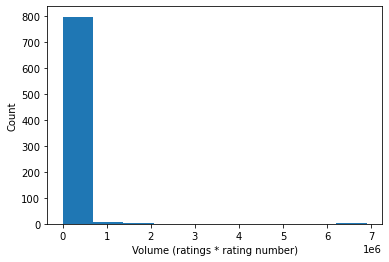

In [16]:
plt.hist(app_data["volume"]) #discard any apps with no ratings
plt.xlabel("Volume (ratings * rating number)")
plt.ylabel("Count")

The histogram of the volumne tells us nothing. Instead, we can "zoom in" on the smaller values:

Text(0, 0.5, 'Count')

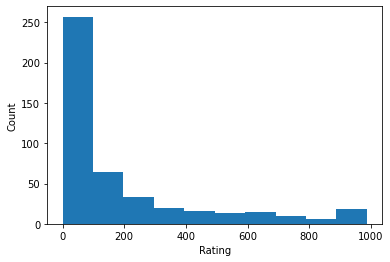

In [17]:
plt.hist(app_data[app_data["volume"] < 1000]["volume"]) #discard any apps with no ratings
plt.xlabel("Rating")
plt.ylabel("Count")

**Observations**: Zooming into this data significantly (to only include volumnes less than 1000), it can still be seen that a vast majority of apps do not actually have high volumnes (for rating * number of ratings). As such, we will next examine the actual number of ratings on each app

Text(0, 0.5, 'Count')

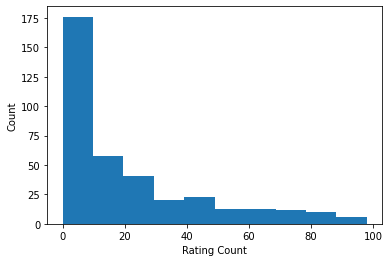

In [18]:
plt.hist(app_data[app_data["rating_count"] < 100]["rating_count"]) #discard any apps with no ratings
plt.xlabel("Rating Count")
plt.ylabel("Count")

**Observations**: Interestingly, Apple does not seem to focus on selecting apps with particularly high volumes of traffic. Instead, most have less than 20 reviews. Possibly app's with a higher "traction rate" (high volume with a recent release date) are given priority? This will be explored next

Text(0.5, 1.0, 'Latest Release Date vs Volume')

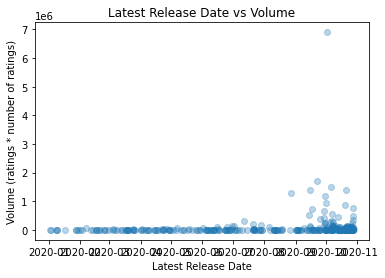

In [19]:
recent_dates = app_data[app_data["date_latest"] >= np.datetime64('2020-01-01')]["date_latest"]
recent_volumes = app_data[app_data["date_latest"] >= np.datetime64('2020-01-01')]["volume"]
plt.scatter(recent_dates, recent_volumes, alpha = 0.3)
plt.xlabel("Latest Release Date")
plt.ylabel("Volume (ratings * number of ratings)")
plt.title("Latest Release Date vs Volume")

**Observations**: Indeed, as proposed, it looks like there is a congregation of apps with (very) recent release dates, and high volume. We will continue to subset this data for observation

Text(0.5, 1.0, 'Latest Release Date vs Volume')

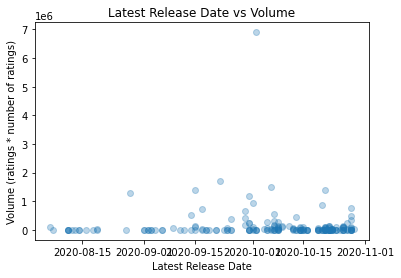

In [20]:
recent_dates = app_data[app_data["date_latest"] >= np.datetime64('2020-08-01')]["date_latest"]
recent_volumes = app_data[app_data["date_latest"] >= np.datetime64('2020-08-01')]["volume"]
plt.scatter(recent_dates, recent_volumes, alpha = 0.3)
plt.xlabel("Latest Release Date")
plt.ylabel("Volume (ratings * number of ratings)")
plt.title("Latest Release Date vs Volume")

**Observations**: It does seem, by the looks of it, that recently released / updated apps have a much higher probability of being classified as "popular".
<br><br>
As such, we will define a new category of analysis that encompasses both release date and volume. We will define it as *traction*: <br>
<br>
Traction = (Volume of App) / (Days since last release)
<br><br>
Given this heuristic formula, higher traction should expect higher probabilities of being classified as "popular"

Text(0, 0.5, 'Count')

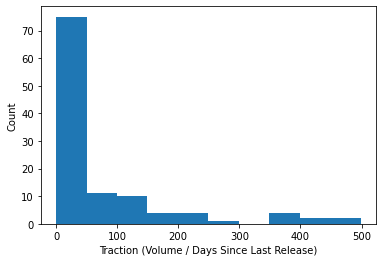

In [21]:
traction = []
count = 0
today = np.datetime64('today') 
for date in app_data["date_latest"]:
    if pd.isnull(date):
        traction.append(0)
    else:
        total_diff = today - date
        seconds = total_diff.total_seconds()
        days = seconds / 86400
        traction.append(round(app_data["volume"][count] / days , 2))
    count += 1
app_data["traction"] = traction
plt.hist((app_data[(app_data["date_latest"] >= np.datetime64('2020-08-01')) & (app_data["traction"] < 500)]["traction"])) #discard any apps with no ratings
plt.xlabel("Traction (Volume / Days Since Last Release)")
plt.ylabel("Count")

**Observations**: Unfortunataly, it does not seem that the "traction" measure provides any more insight than the rating vs count histogram (although it condensed these variables all into a single measure). Instead, we will attempt to simply provide some statistics about the dataset involving release dates

In [22]:
total_apps = len(app_data)
new_apps = app_data[app_data["date_latest"] >= np.datetime64('2020-09-30')]
new_count = len(new_apps)
days_10 = new_count / total_apps
new_apps = app_data[app_data["date_latest"] >= np.datetime64('2020-09-10')]
new_count = len(new_apps)
days_30 = new_count / total_apps
new_apps = app_data[app_data["date_latest"] >= np.datetime64('2020-07-10')]
new_count = len(new_apps)
mon_3 = new_count / total_apps

print(str(round(days_10 * 100, 2)) + "% of the 'popular apps' have been updated or published within 10 days")
print(str(round(days_30 * 100, 2)) + "% of the 'popular apps' have been updated or published within one month")
print(str(round(mon_3 * 100, 2)) + "% of the 'popular apps' have been updated or published within 3 months")
app_data.to_csv("app_data_final_real.csv", index=False)

16.73% of the 'popular apps' have been updated or published within 10 days
20.05% of the 'popular apps' have been updated or published within one month
25.46% of the 'popular apps' have been updated or published within 3 months


**Observations**: Excluding any information regarding the volume or ratings of the app, these proportions seem to provide a very interesting insight into the data, confirming the proposition that a large chunk of the apps have been updated fairly recently (within 3 months). This will definitely provide an area for further analysis.

This concludes the initial exploratory phase. Based on the initial analysis of data, the research question stands, and revision is not needed at this moment, although the next steps will include delving even further into certain aspects and derivations of the data (as described in the "Limitations" section, in order to draw more insightful relationships. 


For the next stage of this project, we aim to prefer the analysis phase of a multivariate logistical regression (in hopes of being able to classify whether or not an app is popular or not, given other attributes about it). Specifically:<br><br>
We have gathered data from “Popular Apps” thus far. So, for the testing phase, we will need to web scrape more data from the general app population. This will be done by likely selecting 10 random applications from every letter page (A-Z) for each of our 4 categories of apps (adventure, action, role-playing, simulation). This will yield 26x10x4 = 1040 apps to train against (very close to the number of popular apps gathered). After gathering and compiling this data, the datasets will be randomly merged with a new classify column (explained above). The popular apps will have a classification of 1. The regular apps will have a classification of 0. We will perform both logistic regression, train/test splits, as well as permutation testing in order to see how well many of our gathered factors (rating count, overall rating, volume, traction, etc…) can be used to determine popularity of any given app. <br><br>
First, we web gather the "normally ranked" apps (using the same web-scraping that was done for the popular apps) and we load and clean the dataframe below.

In [4]:
import pandas as pd
app_data = pd.read_csv("app_data_final_real.csv")
app_data_bad = pd.read_csv("app_data_final_real_bad.csv")
app_data = app_data.fillna(value = "")
app_data_bad = app_data_bad.fillna(value = "")
app_data.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count,description_length,summary_length,volume,traction
0,‎Join Clash,Epic survival run! Racing adventure that will ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fill the City with Crowd!,4.6,0.0,6,2020-10-01,"Hopefully I have your attention! So first off,...","Join Clash, SUPERSONIC STUDIOS LTD, Games, Cas...",200600,1589,25,922760.0,16777.45
1,‎Survivalcraft 2 Day One,You are marooned on the shores of an infinite ...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Advanced Survival and Creative,3.5,0.0,144,2020-01-02,I was considering buying the full version. I w...,"Survivalcraft 2 Day One, Igor Kalicinski, Game...",614,1343,30,2149.0,6.55
2,‎Samurai Slash - Run & Slice,You are the last samurai. Cut off the bullets ...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fun Dash & Cut game,5.0,0.0,,,,"Samurai Slash - Run & Slice, Ketchapp, Games, ...",6,361,19,30.0,0.00
3,‎MilkChoco - Online FPS,Battle Royale Mode released!! : Survival mode ...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Simple FPS online Game,4.4,0.0,,2020-04-08,"So, I just started playing this game and have ...","MilkChoco - Online FPS, GameParadiso, Games, A...",1300,1353,22,5720.0,24.76
4,‎Grand Theft Auto V: The Manual,GTAV: The Manual is the official manual app fo...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,3.9,0.0,157,2020-02-14,This is the kind of application every great ga...,"Grand Theft Auto V: The Manual, Rockstar Games...",2200,2148,0,8580.0,30.11


In [5]:
app_data_bad.head()

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count,description_length,summary_length,volume,traction
0,‎ABC Nursery Runner For Kids,ABC Learn All Alphabet is an educational game ...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,,0.0,0.0,,,,"ABC Nursery Runner For Kids, Tanawat Prakaewva...",0,279,0,0.0,0.00
1,‎AA Colors - 99 Problems,Classic game with full of fun and addiction. Y...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,,5.0,0.0,,2015-12-15,,"AA Colors - 99 Problems, Duy Nguyen, Games, Ac...",2,280,0,10.0,0.01
2,‎Abcar Race,"NOW FREE !!!!!!!!!!! In Abcar Race, you can ra...",https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,5.0,0.0,,2014-11-07,,"Abcar Race, ARDEVTEK YAZILIM, Games, Action, R...",1,321,0,5.0,0.00
3,‎ABC Knight Run,"Play as the ABC Knight, the curious noble who ...",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,5.0,0.0,,2017-06-08,,"ABC Knight Run, Brandon Bombard, Games, Advent...",1,565,0,5.0,0.00
4,‎Absolute Defense,"Defend your zone, upgrade your turrets and bea...",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,,0.0,0.0,,,,"Absolute Defense, RedLine Games, Games, Action...",0,71,0,0.0,0.00


Next, we remove possible duplicates (apps normally gathered, that were by chance also popular apps)

In [6]:
print(len(app_data_bad))
app_data_bad = app_data_bad[~app_data_bad["name"].isin(app_data["name"])]

print(len(app_data_bad))

1015
1003


As we can see, there were 12 such apps.

Next, we need to convert some qualatative categories into quantatative (numerical) scores for *both* the popular, and normal apps. Taking the icon image specifically:<br><br>

We begin by retrieving the image URL, and passing it to an API call, that returns the primary colors extracted in a dictionary (along with their respective weights). We take all of these colors, and convert each into a "score", given the following criteria: We take the hex value and convert into an RGB. We add the sum and find the mean, then find the variance of the 3-tuple of color values. A low variance will indicate darker colors (similar RGB values). A large variance will indicate very bright colors (highly spread out range of colors). We return this value over 43350 (the total possible variance) in order to maintain a ratio out of 1. We do this for every color in the image and sum up the results to get a "score" for each image. Higher scores indicate brighter icons, with potentially more appealing visuals that users will be prompted to click on. 

In [34]:
import requests
import urllib.request
import math

def hex_to_rgb(hex):
    hlen = len(hex)
    return tuple(int(hex[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))
def var_color(rgb):
    mean = (rgb[0] + rgb[1] + rgb[2]) / 3
    var_sum = 0
    for i in range(3):
        var_sum += math.pow((rgb[i] - mean), 2)
    return var_sum / 43350

def return_color_scores(apps):
    colors_score = []
    for img in apps["icon"]:
        if img != "":
            urllib.request.urlretrieve(img, "next.png")

            api_key = 'acc_9e36f4af1cbce4a'
            api_secret = 'b912fdcc1b10c6b21e675a9dc445c4e2'
            image_path = 'next.png'

            response = requests.post(
                'https://api.imagga.com/v2/colors',
                auth=(api_key, api_secret),
                files={'image': open(image_path, 'rb')})
            res =response.json()
            hex_vals = []
            weight = []

            for color_dict in res["result"]["colors"]["background_colors"]:
                hex_vals.append(color_dict["closest_palette_color_html_code"][1:])
                weight.append(.01 * color_dict["percent"])

            for color_dict in res["result"]["colors"]["foreground_colors"]:
                hex_vals.append(color_dict["closest_palette_color_html_code"][1:])
                weight.append(.01 * color_dict["percent"])
            total = 0
            i = 0
            for hex_v in hex_vals:
                total += weight[i] * var_color(hex_to_rgb(hex_v))
                i += 1
            print(total)
            time.sleep(3)
            colors_score.append(1000*total)
        else:
            colors_score.append(0)
    return colors_score
app_scores = return_color_scores(app_data)
app_scores_bad = return_color_scores(app_data_bad)


In [39]:
print("Maximum color score (out of 100) for Popular Apps: " + str(round(max(app_scores), 3)))
print("Maximum color score (out of 100) for Normal Apps: " + str(round(max(app_scores_bad), 3)))


Maximum color score (out of 100) for Popular Apps: 19.86
Maximum color score (out of 100) for Normal Apps: 19.972


None of the apps tested acheived a particularly high color score based on the proposed heuristic. To see if these apps are distinguishable based on the color scores given, we can also look at the mean scores:

In [43]:
print("Mean color score (out of 100) for Popular Apps: " + str(round(np.mean(app_scores), 3)))
print("Mean color score (out of 100) for Normal Apps: " + str(round(np.mean(app_scores_bad), 3)))

Mean color score (out of 100) for Popular Apps: 5.098
Mean color score (out of 100) for Normal Apps: 5.127


Based on the similar means, it is reasonable that either color scheme has no significant impact on the popularity of an app, or our color score heuristic was not an accurate predictor. Regardless, we will exclude this category from further analysis.<br><br>

For the next primary category, we must convert keywords into a numerical score. To do this, we will loop through every keyword in every app, and add them all into a word frequency dictionary. Then, we will again loop through the keywords for every app, and add together a total score based on the frequency of every given keyword (for example, if "term1" appeared a total of 20 times, it will contribute 20 points to any app that used this keyword). Finally, it is important to note that most large game development companies used their own company name as a keyword. This frequency usually appears more than once but less than 10 times for any developer. So, this case will be handled specially, and we will double any score of an app we predict to be from a large developer.

In [7]:
word_count_pop = {}
for keywords in app_data["keywords"]:
    for word in keywords.split(","): 
        word = word.strip(" ")
        if word not in word_count_pop:
            word_count_pop[word] = 0 
        word_count_pop[word] += 1

for keywords in app_data_bad["keywords"]:
    for word in keywords.split(","): 
        word = word.strip(" ")
        if word not in word_count_pop:
            word_count_pop[word] = 0 
        word_count_pop[word] += 1  


score_pop = []
for keywords in app_data["keywords"]:
    wc = 0
    big_dev = 0
    for word in keywords.split(","): 
        word = word.strip(" ")
        if word in word_count_pop:
            if word_count_pop[word] > 1 and word_count_pop[word] < 10:
                # Likely big-name developer
                big_dev = 1
            else:
                wc += word_count_pop[word]
    if big_dev == 1:
        score_pop.append(wc * 2)
    else:
        score_pop.append(wc)

score_non = []
for keywords in app_data_bad["keywords"]:
    wc = 0
    big_dev = 0
    for word in keywords.split(","): 
        word = word.strip(" ")
        if word in word_count_pop:
            if word_count_pop[word] > 1 and word_count_pop[word] < 10:
                # Likely big-name developer
                big_dev = 1
            else:
                wc += word_count_pop[word]
    if big_dev == 1:
        score_non.append(wc * 2)
    else:
        score_non.append(wc)

app_data["keywords"] = score_pop  
app_data_bad["keywords"] = score_non      

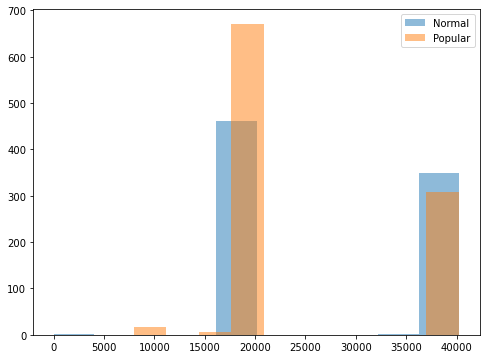

In [283]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(score_pop, alpha=0.5, label="data1")
plt.hist(score_non, alpha=0.5, label="data2")
plt.legend(['Normal', 'Popular'])


Above, we see the histograms of each app's scores for keywords. Popular apps in blue and normal apps in orange. There is not a significant difference, but enough so in the favor of the popular apps that it may provide a useful insight in the final regression model.

We begin our regression model by adding in a "classify" category to every app (1 if popular, 0 if normal).

In [140]:
good = []
bad = []
for i in range(len(app_data)):
    good.append(1)
for i in range(len(app_data_bad)):
    bad.append(0)
app_data["classify"] = good
app_data_bad["classify"] = bad

Next, we concatenate the dataframes, and randomize the rows:

In [141]:
frames = [app_data, app_data_bad]
apps_all = pd.concat(frames)
apps_all = apps_all.sample(frac=1)
apps_all[0:50]
ratings = []
for rating in apps_all["rank"]:
    if rating == "":
        ratings.append(0)
    else:
        ratings.append(1)
apps_all["rank"] = ratings
apps_all

,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count,description_length,summary_length,volume,traction,classify
388,‎Natural Island,"On one morning, you lost your memory and find ...",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Find the treasure chest,0.0,0.00,0,2020-03-02,,19183,0,900,23,0.0,0.00,0
571,‎Miga Town : Game & TV Shows,Have a tour in a brand new scene at the TV sta...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Made eveything different!,3.6,0.00,1,2020-03-12,This is a really fun game. You can get pretty ...,19605,791,1296,25,2847.6,11.04,1
567,‎Farm Life Farming Simulator,"Start your own farming business, cultivate the...",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Farmer Simulator Farm Games,4.9,0.00,0,2020-10-09,Requires iOS 10.0 or later. Compatible with iP...,20026,7,1117,27,34.3,0.75,0
437,‎Safari Pro Hunter - The Jungle Hunting Season...,Safari Pro Hunter - The Jungle Hunting Season ...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,,0.0,0.00,0,2016-03-17,,19264,0,1385,0,0.0,0.00,0
1002,‎Yellow Cab Driver 2016 Real Las Vegas City Tr...,As a taxi driver you have a big responsibility...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,5.0,0.00,0,2016-11-15,,19547,1,1333,0,5.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,‎Newborn Baby Care Babysitter,Babies are so adorable! Every new born baby ne...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Babysitting Games For Girls,4.6,0.00,0,2020-07-15,,18823,10,2825,27,46.0,0.35,0
119,‎Land the Eagle,Land the Lunar Module on the surface without c...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,3.3,0.00,0,2014-03-06,,19259,3,161,0,9.9,0.00,0
914,‎PaD Lix,"Have you played iOS game ""Puzzle & Dragons""? T...",https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,0.0,0.00,0,2014-10-15,,37492,0,970,0,0.0,0.00,0
300,‎Atlantis 3: The New World (Universal),A dreamy trip to Atlantis In 2020 in the dese...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,3.0,2.99,0,,I really wish the Microid games were more thor...,40058,3,2127,0,9.0,0.00,1


We create the actual model now, including attributes of keywords, rating, price, rank, rating count, description length, summary length, volume, and traction, in order to predict classification:

In [284]:
attributes = ["keywords", "rating", "price", "rank", "rating_count", "description_length", "summary_length", "volume", "traction"]

We strive to identify how well the attributes are able to predict "unknown" apps. As such, we will use a training / testing split, with the training sample as 80% of our available apps, and the testing sample as 20%.

In [144]:
from sklearn.model_selection import train_test_split
app_train, app_test = train_test_split(apps_all, test_size = 0.2, random_state = 15)
print("App Training:")
app_train.head()

App Training:


,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count,description_length,summary_length,volume,traction,classify
686,‎Escapists 2: Pocket Breakout,"The Escapists 2 is a hilariously thrilling, sa...",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Prison Escape Simulator,4.7,6.99,1,2020-03-24,UPDATE: The Past Review was talking about a bu...,19597,5400,1155,23,25380.0,103.17,1
811,‎Helicopter Simulator 2018,Master all the helicopters controls in this am...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,SimCopter 2018 Helicopter Sim,2.7,0.00,0,2020-06-14,"This is the best game ever, I turn on the heli...",40212,165,1187,29,445.5,2.72,1
1010,‎Zombie Motors,Protect the zombie apocalypse! Zombies have wo...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Construct - fight - win!,4.4,0.00,0,2019-04-12,"It’s creative, intuitive, and I haven’t played...",18746,26,554,24,114.4,0.19,0
461,‎MARVEL Puzzle Quest: Hero RPG,Marvel Comics Super Heroes come to life in thi...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Avengers Fight: Match 3 Games,4.6,0.00,0,2020-10-26,This game is great. It is the only game I’ve e...,19554,21100,3552,29,97060.0,3235.33,1
441,‎Pocket MUD Pro,Now available on iPhone AND iPad! Pocket MUD P...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,2.8,2.99,0,2015-02-27,The only issue I have with this is that voiceo...,20031,9,1592,0,25.2,0.01,1


In [351]:
print("App Testing:")
app_test.head()

App Testing:


,name,description,icon,summary,rating,price,rank,date_latest,reviews,keywords,rating_count,description_length,summary_length,volume,traction,classify
437,‎Her Majesty's SPIFFING,The Empire Staggers Back! After Britain electe...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,,4.4,3.99,0,2017-05-12,"Filled with great humor and fun, it's short bu...",19599,13,1477,0,57.2,0.04,1
944,‎S.O.S,「たすけてぇぇ！S.O.S！」 遭難者を全員救助せよぉぉぉ！！！ ■遊び方 右画面タップの...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,0.0,0.00,0,2015-09-07,,18787,0,338,0,0.0,0.00,0
540,‎Acrobat Star Show,~~> Congrats! You’ve been accepted to the hott...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Show 'em what you got!,4.7,0.00,1,2020-10-07,Ever sense ice princess came out to the App St...,40050,63800,1487,22,299860.0,6119.59,1
887,‎Neon Fidget Spinner Simulator,Work pressure and life stress is too much? Swi...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,DIY Neon Fidget Hand Spinner!,0.0,0.00,0,,,19635,0,1014,29,0.0,0.00,0
422,‎Spartan Firefight,Get ready for the Firefight! From the creators...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Get ready for the Firefight!,4.8,0.00,0,2020-10-02,Easily my favorite game on the App Store! I ju...,18916,861,1515,28,4132.8,76.53,1


Since our outputs will either be 0 (normal app) or 1 (popular app), it is important to use a logistic regression model here, with all of our aforementioned variables as input.

In [146]:
from sklearn.linear_model import LogisticRegression

model_pred = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attributes], app_train["classify"])

correct = sum(app_train["classify"] == model_pred.predict(app_train[attributes]))
total_test = len(app_train)
print("Prediction Accuracy (Training Data): {per: .1f}%".format(per = 100 * (correct / total_test)))

correct = sum(app_test["classify"] == model_pred.predict(app_test[attributes]))
total_test = len(app_test)
print("Prediction Accuracy (Test Data): {per: .1f}%".format(per = 100 * (correct / total_test)))

Prediction Accuracy (Training Data):  69.4%
Prediction Accuracy (Test Data):  70.9%


The original model seems to perform well: it achieves an accuracy of 69.4% and 70.9% on the training / testing data, respectively. To verify these percentages, we will also print the R-squared scores, since, in theory, the R-squared (depending on SKLearn's implementation, as there are different computations for it) should be close to the accuracy.

In [288]:
print("Training R-squared: " + str(round(model_pred.score(app_train[attributes], app_train["classify"]), 3)))
print("Testing R-squared: " + str(round(model_pred.score(app_test[attributes], app_test["classify"]), 3)))

Training R-squared: 0.694
Testing R-squared: 0.709


As expected, the R-squared values (the proportion of the results that can be attributed to the given input variables) are actually equal to the accuracy of the model. However, is this percentage quantatatively *good*? To know this, let us examine the baseline proportion of popular apps in the sample (if 70% of the apps in the training set are "popular", for example, then this prediction is not so great, as it falls exactly on the baseline!)

In [289]:
print("Popular Apps in Training Set: "+str(len(app_train[app_train["classify"] == 1])))
print("Total Apps in Training Set: "+str(len(app_train)))
print("Baseline Proportion: "+str(652/1452))

Popular Apps in Training Set: 644
Total Apps in Training Set: 1452
Baseline Proportion: 0.4490358126721763


The baseline proportion of "popular apps" we are working with is roughly 44.9%. So, if our model were to given random classifications every time, we would expect around 45% accuracy. As such, our original model's performance of 70% is more impressive than expected.

It is important to note though, that this model utilizes *all* of the attributes we provided. For the next section, we will take a deeper look at some of the independent attributes, and how each one (or combinations of subsets of the original 9 attributes) affect the model's accuracy. 

We begin with the goal of identifying which single factor(s) have the *most* influence in creating an accurate model. We do this by looping through every single attribute, and using it to create its own, single-variable predictor model, and we output the overall accuracy of each:

In [352]:
for at in attributes:
    single_pred = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[[at]], app_train["classify"])
    print("Accuracy of "+at+": "+str(round(single_pred.score(app_test[[at]], app_test["classify"]), 3)))

Accuracy of keywords: 0.536
Accuracy of rating: 0.676
Accuracy of price: 0.67
Accuracy of rank: 0.632
Accuracy of rating_count: 0.593
Accuracy of description_length: 0.588
Accuracy of summary_length: 0.61
Accuracy of volume: 0.593
Accuracy of traction: 0.681


Based on each individual accuracy, it can be seen that the single most prevalent factors in accurate indentification of a popular app is traction (68.1% accurate), rating (67.6% accurate), and price (67% accurate). On their own though, most factors are not particularly insightful predictors, and *none* of them exceed the multivariate prediction on their own. This emphasizes the idea that, when combined all together, many of these not-independently-strong factors can contribute to a much higher overall multivariate accuracy. Is it possible though to simplify our model (reduce the number of factors needed) to acheive just as high of an accuracy? To experiment with this, we will create a model using only our top 3 individual factors: traction, rating, and price:

In [301]:
attr = ["rating" , "price", "traction"]
model = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr], app_train["classify"])
print("Training Accuracy (rating, price, traction): " + str(round(model.score(app_train[attr], app_train["classify"]), 3)))
print("Testing Accuracy (rating, price, traction): " + str(round(model.score(app_test[attr], app_test["classify"]), 3)))

Training Accuracy (rating, price, traction): 0.635
Testing Accuracy (rating, price, traction): 0.701


This newer model actually performs *lower* on the training data (63.5%), although the test accuracy is a bit higher at (70.1%, but still not exceeding the original model). This suggests that some combinations of attributes for our models may cause confounding results, and thus, lower accuracy. With this discovery, we will attempt to try a few combinations of variables to see how they impact the results.

First, let's exclude volume and summary (some of the lower accuracy predictors):

In [303]:
attr = ["keywords", "rating", "price", "rank", "rating_count", "description_length", "traction"]
model = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr], app_train["classify"])
print("Training Accuracy (all factors EXCEPT volume / summary): " + str(round(model.score(app_train[attr], app_train["classify"]), 3)))
print("Testing Accuracy (all factors EXCEPT volume / summary): " + str(round(model.score(app_test[attr], app_test["classify"]), 3)))

Training Accuracy (all factors EXCEPT volume / summary): 0.72
Testing Accuracy (all factors EXCEPT volume / summary): 0.742


The model above emphasizes our point above: by simply *removing* two attributes (specifically volume and summary length) we were able to *increase* our model's accuracy by a relatively strong amount. Below, we continue to remove a few more attributes (pice, rank, rating_count) to see the effects:

In [305]:
attr_bad = ["keywords", "rating", "description_length", "traction"]
model_bad = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_bad], app_train["classify"])
print("Training Accuracy (all factors EXCEPT volume, summary, price, rank, rating_count): " + str(round(model_bad.score(app_train[attr_bad], app_train["classify"]), 3)))
print("Testing Accuracy (all factors EXCEPT volume, summary, price, rank, rating_count): " + str(round(model_bad.score(app_test[attr_bad], app_test["classify"]), 3)))

Training Accuracy (all factors EXCEPT volume, summary, price, rank, rating_count): 0.566
Testing Accuracy (all factors EXCEPT volume, summary, price, rank, rating_count): 0.549


As evident by the near-baseline accuracy above, it turns out that in regards to the other variables in the model, price, rank, and rating_count were all crucial factors, and without them, results were much worse. To go a step further, let us remove an additional, important factor (traction) to see how the model is impacted:

In [308]:
attr = ["keywords", "rating", "description_length"]
model = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr], app_train["classify"])
print("Training Accuracy (now without traction): " + str(round(model.score(app_train[attr], app_train["classify"]), 3)))
print("Testing Accuracy (now without traction): " + str(round(model.score(app_test[attr], app_test["classify"]), 3)))

Training Accuracy (now without traction): 0.663
Testing Accuracy (now without traction): 0.684


Interestingly, traction--the attribute with the indepedently highest accuracy--improved our accuracy here on the test data by 13.5%...when it was *removed*. This concludes our evidence that there indeed seem to be many confounding factors in the data, to the extent that even well-performing features (such as traction) have the potential to decrease specific models sharply, based on the other information availible.

Although what we have gathered thus far emphasizes an extremely complex, interwoven relationship between all of these variables and factors that go into classifying an app, it is not quite satisfying to have a model that classifies an app just "well enough". There are many combinations and subsets of attributes we can choose, many of which would likely achieve higher accuracy results than expected, and it would be incomplete if we did not delve into exploration to find the most optimal possibilies for our model. 

Instead of going through every single possible subset and combination of attributes available, we propose a heuristic: <br><br>
We will examine models from 1 attribute (9 possibilities) all the way to models with all 9 attributes (the single, original model). We choose the attributes randomly (using random.sample) and perform the same logistic regression, recording the accuracy and attributes (where accuracy is the average of the training accuracy and the test accuracy). If the accuracy of the given random combination exceeds the current highest accuracy, we set the new best_acc to this value, and the best_attr becomes the list of sttributes for that accuracy. We start by repeating this with 10 random samples for every length.

In [323]:
import random
attributes = ["keywords", "rating", "price", "rank", "rating_count", "description_length", "summary_length", "volume", "traction"]
best_attr = []
best_acc = 0.0
for length in range(10):
    if (length > 0):
        for i in range(10):
            attr_curr = random.sample(attributes, length)
            model = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_curr], app_train["classify"])
            score1 = model.score(app_train[attr_curr], app_train["classify"])
            score2 = model.score(app_test[attr_curr], app_test["classify"])
            score_curr = (score1 + score2) / 2
            if score_curr > best_acc:
                best_acc = score_curr
                best_attr = attr_curr
s = ""
for a in best_attr:
    s += a + ", "
s = s[:-2]
print("Best Attributes in Sample: "+ s)
print("Accuracy of Given Attributes: " + str(round(best_acc, 3)))

Best Attributes in Sample: description_length, price, rating_count, volume, rank, traction
Accuracy of Given Attributes: 0.778


With only 10 combinations per length (1..9), we already acheive a model already better than our current best model--77.8% compared to the previously achieved (72 + 74.2) / 2 = 73.1%. Let us increase our number of combinations to 50 per length, in order to test more combinations:

In [325]:
import random
attributes = ["keywords", "rating", "price", "rank", "rating_count", "description_length", "summary_length", "volume", "traction"]
best_attr = []
best_acc = 0.0
for length in range(10):
    if (length > 0):
        for i in range(50):
            attr_curr = random.sample(attributes, length)
            model = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_curr], app_train["classify"])
            score1 = model.score(app_train[attr_curr], app_train["classify"])
            score2 = model.score(app_test[attr_curr], app_test["classify"])
            score_curr = (score1 + score2) / 2
            if score_curr > best_acc:
                best_acc = score_curr
                best_attr = attr_curr
s = ""
for a in best_attr:
    s += a + ", "
s = s[:-2]
print("Best Attributes in Sample: "+ s)
print("Accuracy of Given Attributes: " + str(round(best_acc, 3)))

Best Attributes in Sample: traction, price, rank, volume, summary_length
Accuracy of Given Attributes: 0.788


We have increased even higher here! To now go for a final, exhaustive test, we will perform a dynamic number of combinations per length (10000 / current length) to see the comprehensive results:

In [329]:
import random
attributes = ["keywords", "rating", "price", "rank", "rating_count", "description_length", "summary_length", "volume", "traction"]
best_attr = []
best_acc = 0.0
for length in range(10):
    if (length > 0):
        for i in range(int(10000 / length)):
            attr_curr = random.sample(attributes, length)
            model = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_curr], app_train["classify"])
            score1 = model.score(app_train[attr_curr], app_train["classify"])
            score2 = model.score(app_test[attr_curr], app_test["classify"])
            score_curr = (score1 + score2) / 2
            if score_curr > best_acc:
                best_acc = score_curr
                best_attr = attr_curr
s = ""
for a in best_attr:
    s += a + ", "
s = s[:-2]
print("Best Attributes in Sample: "+ s)
print("Accuracy of Given Attributes: " + str(round(best_acc, 3)))

Best Attributes in Sample: price, traction, rank, volume
Accuracy of Given Attributes: 0.795


Our best model identified contains the price, traction, rank, and volume attributes, with an accuracy of 79.5%. Let's "zoom in" on this model individually:

In [331]:
attr_BEST = [ "price", "traction", "rank", "volume"]
model_BEST = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_BEST], app_train["classify"])
print("Best Model Training Accuracy: " + str(round(model_BEST.score(app_train[attr_BEST], app_train["classify"]), 3)))
print("Best Model Test Accuracy: " + str(round(model_BEST.score(app_test[attr_BEST], app_test["classify"]), 3)))

Best Model Training Accuracy: 0.797
Best Model Test Accuracy: 0.794


Given that the original baseline proportion is 44.9%, our final prediction results of 79.5% accuracy (averaged train/test) are 1.77 times higher than the baseline proportion. We were also able to improve our original model 9.35 percentage points by simply exhausting and testing different combinations of attributes. Although not perfect, this seems to be a relatively strong indication that the final factors we considered (price, traction, rank, volume) are accurate predictors of app popularity.

Next though, we must consider whether or not these results are significant. To gather an initial idea, we will get a summary of our model's p-values from statmodels (as shown in lecture).

In [337]:
import statsmodels.api as sm
est = sm.OLS(apps_all["classify"], apps_all[attr_BEST]).fit()
est.pvalues

price       1.743293e-39
traction    2.382123e-01
rank        4.321357e-58
volume      1.208163e-02
dtype: float64

As seen by intial interpretation, our p-values are extremely low (roughly 0) for every factor except volume, which is 0.012, and traction, which has a p-value of .238 (the only *non*-significant variable). As such, we can conclude that our results are very significant for the most part, and that the results we achieved are extremely unlikely due to chance. 

Finally, we will sum it all together using our own permutation test, using the statmodels results as a guideline. In order to perform this permutation test, we permute our y-values (the "classify" column) in order to achieve a "random" model, that should, in theory, have no correlation. We will compare the fake trained model's accuracy to our real best model's accuracy, and see the proportion of fake models predictions that exceeded the accuracy of the real model's predictions. After 10000 permutations, we will see the proportion of times the fake model beat the real model. This will be our p-value.

But first, to make sure our fake model and permutations function properly, we will compare two fake models to each other in a 100 iteration test. We should expect a p-value around 0.5:

In [348]:
import numpy as np
def permute(y):
    # shuffle modifies the array itself, so first make a copy
    permuted_y = y.copy()
    # now randomize it
    np.random.shuffle(permuted_y.values)
    return permuted_y

steeper_slopes = 0
total_fake_R = 0.0
n_permutations = 100
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_y = permute(app_train["classify"])
    model_fake = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_BEST], fake_y)
    
    fake_y_2 = permute(app_train["classify"])
    model_fake_2 = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_BEST], fake_y_2)
    total_fake_R += model_fake.score(app_train[attr_BEST], fake_y)
    if sum(np.abs(model_fake.coef_[0])) >= sum(np.abs(model_fake_2.coef_[0])):
        steeper_slopes += 1
    
print("P-value (for 2 fake models): " + str(round((steeper_slopes / n_permutations), 3)))
print("Average R-squared value of fake model: " + str(round(total_fake_R / 100, 3)))

P-value (for 2 fake models): 0.55
Average R-squared value of fake model: 0.517


The p-value is extremely high around the expected 0.5. Also the low R-squared score verifies the randomness. So, the fake models verify that they have, indeed, no relationship. Now we can finally test the fake model against the real model, with 10000 permutations:

In [350]:
steeper_slopes = 0
total_fake_R = 0.0
n_permutations = 10000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_y = permute(app_train["classify"])
    model_fake = LogisticRegression(solver="lbfgs", max_iter=1000).fit(app_train[attr_BEST], fake_y)
    
    total_fake_R += model_fake.score(app_train[attr_BEST], fake_y)
    if sum(np.abs(model_fake.coef_[0])) >= sum(np.abs(model_BEST.coef_[0])):
        steeper_slopes += 1
    
print("P-value (fake model versus real): " + str(round((steeper_slopes / n_permutations), 4)))
print("Average R-squared value of fake model: " + str(round(total_fake_R / 100, 3)))

P-value (fake model versus real): 0.0
Average R-squared value of fake model: 52.227


Our average p-score overall is 0.000 over 10000 trials--not a single one of the fake model's predictions exceeded the accuracy of our real model. This again indicates not only a strong relationship between our selected attributes, but a *significant* relationship as well.

# Conclusion

In concluding this project, we were able to go through the entire process of collecting, cleaning, analyzing, testing, and building models from existing data in the real-world (specifically Apple's app store). Through this research, many complex relationships were discovered and analyzed, and through experimentation, the best predicting factors for an app's popularity were identified, tested, and found to be significant. Hence, the end result is the creation of an accurate (roughly 80%), significant (p-value close to 0) model for predicting an app's relative popularity based on its price, traction (volume over time), rank, and volume (reviews * rating). This is useful for current apps in the app store that already have data; however, there are evident limitations. For example, the final model predicts based on collected Apple data from the application, and as such, it cannot be used to give developers any insight into their app *before* it is released. This though, would certainly be the next steps for this project, as less obvious variables and relationships would need to be explored, in hopes of not only giving current developers insight into their apps, but also future developers.